In [21]:
## Credit Crisk with M/L

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
####IMPORTING TRAINING AND TEST DATA SETS ######
TrainData = pd.read_csv("R_Module_Day_7.2_Credit_Risk_Train_data.csv")
TestData = pd.read_csv("R_Module_Day_8.2_Credit_Risk_Test_data.csv")

In [3]:
####CREATING A NEW COLUMN SOURCE UNDER BOTH TRAIN AND TEST DATA
TrainData["Source"] = "Train"
TestData["Source"] = "Test"

In [4]:
####COMBINE BOTH TRAIN AND TEST AS FULL DATA
FullData = pd.concat([TrainData,TestData])
FullData.shape

(981, 14)

In [5]:
###View starting 5 records
FullData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Train


In [6]:
####Check the summary of Numerical variables
FullData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
####Working on Categorical variable Dependents
FullData.Dependents.value_counts()   ###THere is an invalid category as 3+

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [8]:
FullData.Dependents = np.where(FullData.Dependents == '3+',3,FullData.Dependents).astype(float)
FullData.Dependents.value_counts()
FullData.Dependents.dtype

dtype('float64')

In [9]:
###Finding MISSING VALUES
FullData.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
Source                0
dtype: int64

In [10]:
## MISSING VALUE IMPUTATION
for col_name in list(FullData):
    if ((col_name not in ['Loan_ID', 'Loan_Status', 'Source']) & (FullData[col_name].isnull().sum() >0)):
        if(FullData[col_name].dtype != object):
            temp1 = FullData[col_name][FullData.Source == "Train"].median()
            FullData[col_name].fillna(temp1, inplace=True)
        else:
            temp2 = FullData[col_name][FullData.Source =="Train"].mode()[0]
            FullData[col_name].fillna(temp2, inplace=True)

FullData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Source               0
dtype: int64

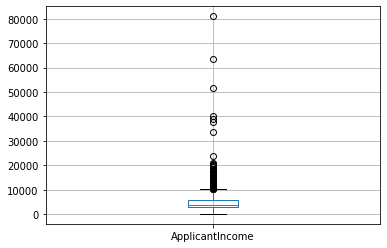

In [11]:
###OUTLIER DETECTION AND CORRECTION
#ApplicantIncome
FullData[FullData.Source == "Train"].boxplot(column = 'ApplicantIncome')
FullData.ApplicantIncome.dtype
np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],[95,96,97,98,99])
        
FullData.ApplicantIncome = np.where(FullData.ApplicantIncome > np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],99),np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],99),FullData.ApplicantIncome)
FullData.ApplicantIncome = np.where(FullData.ApplicantIncome > np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],95),np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],95),FullData.ApplicantIncome)
FullData.ApplicantIncome = np.where(FullData.ApplicantIncome > np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],90),np.percentile(FullData.loc[FullData.Source == "Train","ApplicantIncome"],90),FullData.ApplicantIncome)

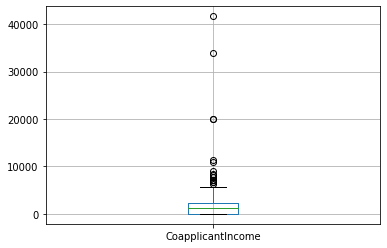

In [12]:
# CoapplicantIncome
FullData.columns
FullData[FullData.Source == "Train"].boxplot(column ="CoapplicantIncome")
np.percentile(FullData.loc[FullData.Source == "Train","CoapplicantIncome"],99)

FullData.CoapplicantIncome = np.where(FullData.CoapplicantIncome > np.percentile(FullData.loc[FullData.Source == "Train","CoapplicantIncome"],99),np.percentile(FullData.loc[FullData.Source == "Train","CoapplicantIncome"],99),FullData.CoapplicantIncome)
FullData.CoapplicantIncome = np.where(FullData.CoapplicantIncome > np.percentile(FullData.loc[FullData.Source == "Train","CoapplicantIncome"],95),np.percentile(FullData.loc[FullData.Source == "Train","CoapplicantIncome"],95),FullData.CoapplicantIncome)

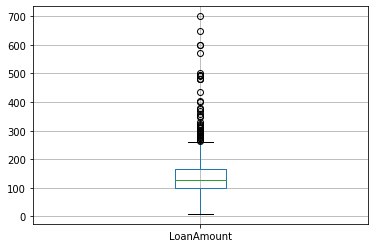

In [13]:
# LoanAmount
FullData[FullData.Source == "Train"].boxplot(column ="LoanAmount")
np.percentile(FullData.loc[FullData.Source =="Train","LoanAmount"],99)
FullData.LoanAmount = np.where(FullData.LoanAmount > np.percentile(FullData.loc[FullData.Source =="Train","LoanAmount"],99),np.percentile(FullData.loc[FullData.Source=="Train","LoanAmount"],99),FullData.LoanAmount)
FullData.LoanAmount = np.where(FullData.LoanAmount > np.percentile(FullData.loc[FullData.Source =="Train","LoanAmount"],95),np.percentile(FullData.loc[FullData.Source=="Train","LoanAmount"],95),FullData.LoanAmount)
FullData.LoanAmount = np.where(FullData.LoanAmount > np.percentile(FullData.loc[FullData.Source =="Train","LoanAmount"],90),np.percentile(FullData.loc[FullData.Source=="Train","LoanAmount"],90),FullData.LoanAmount)


In [14]:
########ONE HOT ENCODING OF CATEGORICAL VARIABLES  BY CREATING DUMMY VARIABLES ########
cat = FullData.loc[:,FullData.dtypes == object].columns
Dummy = pd.get_dummies(FullData[cat].drop(['Loan_ID', 'Source', 'Loan_Status'], axis = 1),drop_first = True)
Dummy.shape
Dummy.columns

FullData2 = pd.concat([FullData,Dummy],axis =1)
FullData2.shape

Cols_To_Drop = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
FullData3 = FullData2.drop(Cols_To_Drop,axis = 1).copy()
FullData3.columns
FullData3.shape

(981, 14)

In [15]:
# Convert Dependent variable into 0,1. If Loan_Status = N, then 1 else 0
FullData3.Loan_Status = np.where(FullData3.Loan_Status == 'N',1,0)
FullData3.Loan_Status.value_counts()
FullData3.shape
FullData3.dtypes

Dependents                 float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Source                      object
Gender_Male                  uint8
Married_Yes                  uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [16]:
######SAMPLING #######################
# Divide the data into Train and Test based on Source column and 
# make sure you drop the source column
Train = FullData3.loc[FullData3.Source == "Train",].drop("Source",axis = 1).copy()
Train.shape

Test = FullData3.loc[FullData3.Source == "Test",].drop("Source",axis =1).copy()
Test.shape

(367, 13)

In [17]:
###DIVIDE EACH DATA SET AS INDEPENDENT AND DEPENDENT VARAIBLES
train_X = Train.drop("Loan_Status",axis = 1)
train_y = Train["Loan_Status"].copy()
test_X = Test.drop("Loan_Status",axis = 1)
test_y = Test["Loan_Status"].copy()

In [18]:
###################MODEL BUILDING ###############################
###SVM MODEL
from sklearn.svm import SVC
from sklearn.metrics import classification_report

M1 = SVC()
Model1 = M1.fit(train_X,train_y)
Pred1 = Model1.predict(test_X)

In [19]:
###CONFUSION MATRIX ##########################################
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(test_y,Pred1)
print(conf1)     #### 79% accuracy
accuracy = ((conf1[0][0] + conf1[1][1])/test_y.shape[0]) * 100

report1 = classification_report(test_y,Pred1)
print(report1)

[[290   0]
 [ 77   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       290
           1       0.00      0.00      0.00        77

    accuracy                           0.79       367
   macro avg       0.40      0.50      0.44       367
weighted avg       0.62      0.79      0.70       367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
###Manual GRID Searches
Model_Validation_Df = pd.DataFrame()
mycost_List = []
mygamma_List = []
mykernel_List = []
accuracy_List = []
for mycost in [1,2]:
    for mygamma in [0.01, 0.1]:
        for mykernel in ['sigmoid','rbf']:
            Temp_Model = SVC(C = mycost, kernel = mykernel, gamma = mygamma)
            Temp_Model = Temp_Model.fit(train_X, train_y)
            Test_Pred = Temp_Model.predict(test_X)
            Confusion_Mat = confusion_matrix(test_y, Test_Pred)
            Temp_Accuracy = ((Confusion_Mat[0][0] + Confusion_Mat[1][1])/test_y.shape[0])*100
            print(mycost, mygamma, mykernel)
            print(Temp_Accuracy)
            print("******************************")
            mycost_List.append(mycost)
            mygamma_List.append(mygamma)
            mykernel_List.append(mykernel)
            accuracy_List.append(Temp_Accuracy)
            
Model_Validation_Df = pd.DataFrame({'Cost': mycost_List, 
                                    'Gamma': mygamma_List, 
                                    'Kernel': mykernel_List, 
                                    'Accuracy': accuracy_List})

1 0.01 sigmoid
79.01907356948229
******************************
1 0.01 rbf
78.2016348773842
******************************
1 0.1 sigmoid
79.01907356948229
******************************
1 0.1 rbf
79.01907356948229
******************************
2 0.01 sigmoid
79.01907356948229
******************************
2 0.01 rbf
78.2016348773842
******************************
2 0.1 sigmoid
79.01907356948229
******************************
2 0.1 rbf
79.01907356948229
******************************
